<a href="https://colab.research.google.com/github/zeitto/Prueba/blob/master/Copia_de_Face_Recognition_using_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalación de librerías

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=6d667cc64f4147ac71c14186018985e6c6609d394a801b23745d7191234051be
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Importación de librerías

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

Funciones Auxiliares

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
def newID(name, typ):
  path =  '/content/'+ typ +'/'+ name +'.jpg' 
  res = take_photo(path)
  print(path)

In [ ]:
!mkdir known
!mkdir unknown

In [ ]:
x = input('Enter your ID:')
newID(x,'known')
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = '/content/known'

res = os.listdir(known_dir)
try:  
  res.remove('.ipynb_checkpoints')
except:
  print("All correct")
for file in res:
    print(file)
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

Enter your ID:edwin


<IPython.core.display.Javascript object>

/content/known/edwin.jpg
7896.jpg
edwin.jpg


<IPython.core.display.Javascript object>

/content/unknown/uk.jpg
All correct
Processing uk.jpg


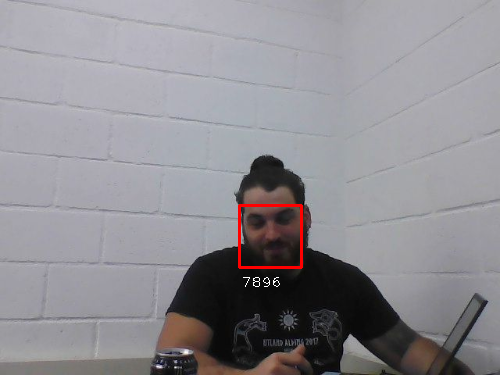

In [ ]:
unknown_dir = 'unknown'
newID('uk','unknown')
res = os.listdir(unknown_dir)
try:  
  res.remove('.ipynb_checkpoints')
except:
  print("All correct")
for file in res:
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            crpimg =  img
            cv2_imshow(img)          
    # print(results)

